# Project - Wrangle and Analyze Data 


By Yalçın Filiz 

In [112]:
#import required pyhton libraries 

import pandas as pd 
import numpy as np 
import requests 
import json 
import matplotlib.pyplot as plt
import tweepy
import os

%matplotlib inline 

## Gather Data 

### 1. The WeRateDogs Twitter archive

In [113]:
# Convert csv file to a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv') 
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 2. The tweet image predictions 

In [114]:
# Download tsv file from udacity server with request library 

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv','wb') as file:
    file.write(r.content)
    
# load file into a dataframe with read_csv method. 

image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [115]:
image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### 3. Twitter API ( tweet_json.txt ) 

"Accessing Project Data Without a Twitter Account." 

* I had verification issues. I downloaded `tweet_json.txt` file from udacity web page as mentioned in the project's Twitter API section.  
* I've copied the given below code to the next cell as mentioned in the project's Twitter API section. I've studied how that code works and I got it.   

In [116]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = archi

Read tweet_json.txt file line by line into a pandas DataFrame

In [117]:
# read the JSON data using json.load() method 
data = [] 
f = 'tweet_json.txt'
with open(f) as tweets:
    for line in tweets:  # for loop to read each line in the JSON 
        dict_tweet = json.loads(line) # create a dict for each line 
    
        data.append({  # add each line as a dict to a list 
            'tweet_id':dict_tweet['id'],
            'retweet_count': dict_tweet['retweet_count'],
            'favorite_count': dict_tweet['favorite_count']
        })

# load data into a dataframe 
df_tweet = pd.DataFrame(data,columns = ['tweet_id','retweet_count','favorite_count'])

df_tweet.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess Data 

### 1. Archive ( The WeRateDogs Twitter archive ) 

In [118]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [119]:
#Check column formats & writing with visual assesment 
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [120]:
#check data types & if there is a missing records
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [121]:
# check if there is a duplicated tweet
archive.tweet_id.duplicated().sum()

0

In [122]:
# Check how many retweets
archive[archive.retweeted_status_id.isnull() == False ].count()

tweet_id                      181
in_reply_to_status_id         0  
in_reply_to_user_id           0  
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

In [123]:
# #check ratings for outliers & incorrect values etc..
archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [124]:
#check name 
archive.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Cooper       11 
Lucy         11 
Penny        10 
Tucker       10 
Lola         10 
Bo           9  
Winston      9  
the          8  
Sadie        8  
Buddy        7  
Daisy        7  
Toby         7  
an           7  
Bailey       7  
Jax          6  
Rusty        6  
Dave         6  
Bella        6  
Leo          6  
Stanley      6  
Scout        6  
Milo         6  
Oscar        6  
Koda         6  
Jack         6  
Sammy        5  
            ..  
Ambrose      1  
Amy          1  
Sprinkles    1  
Millie       1  
Shnuggles    1  
Caryl        1  
Katie        1  
Jaspers      1  
Lugan        1  
Bradley      1  
Ben          1  
Anthony      1  
Jareld       1  
Rascal       1  
Asher        1  
Chuck        1  
Zara         1  
Monkey       1  
Gilbert      1  
space        1  
Kota         1  
Chuq         1  
Nico         1  
Callie       1  
Obie         1  
Tito         1  
Sprout       1  
Coleman      1

### 2. The tweet image predictions ( image )

In [125]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [126]:
image.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True
1798,831650051525054464,https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,1,Eskimo_dog,0.530416,True,Siberian_husky,0.180335,True,Norwegian_elkhound,0.104314,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,0.035440,True
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
988,707776935007539200,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,miniature_pinscher,0.890426,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [127]:
#check for data types & missing records 
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [128]:
#check for duplicates
image.tweet_id.duplicated().sum()

0

## 3. Twitter API ( df_tweet)

In [129]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [130]:
df_tweet.sample(25)

,tweet_id,retweet_count,favorite_count
1451,695629776980148225,2377,5020
1449,695794761660297217,880,3490
1148,726224900189511680,1302,4811
1642,683852578183077888,397,2111
1467,694183373896572928,1040,3236
1218,714606013974974464,1038,3938
2306,666817836334096384,267,540
998,747963614829678593,2444,6397
867,761745352076779520,979,4707
2118,670411370698022913,991,2176


In [131]:
#check ratings for outliers & incorrect values etc.. 
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [132]:
df_tweet.duplicated().sum()

0

## Assesment Findings

### Quality Items

**archive**

* Tweet_id data type must be string 
* timestamp columns data type must be datetime
* Source column are not easy to read 
* There are 181 retweets
* There are some incorrect Rating (nominator & denominator) values. for example some denominators are greater than 10. 
* There are so many 'a' in name column. 
* Name column has 'None' values instead of NaN
* __doggo,floofer,pupper & puppo colums data type to category__
* Missing record in expanded_urls ( 2297 < 2356 ) 


**image** 

* Tweet_id data type must be string
* __Missing records in image.There are more records in archive dataframe rather than image dataframe__
* writing is not consistent in p1, p2, p3
* __There are some non-dog images__

**df_tweets**

* Tweet_id data type must be string

Note: bold items will be fixed after merging all data frames

### Tidiness

* Type of dogs should be one colum as category 
* We can merge all data frames by tweet_id
* Remove unnecessary columns 
* Create a new column (numerator / denominator ) to compare ratings easily and for better analysis





## Clean Data 

In [133]:
# Copy dataframes for cleaning
archive_clean = archive.copy()
image_clean = image.copy()
tweet_clean = df_tweet.copy()

### Quality Items 

In [134]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


**Tweet_id data type must be string**

**Define** 

Convert to string

**Code**

In [135]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

**Test**

In [136]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

**timestamp columns data type must be datetime**

**Define** 

Convert "timestamp" & "retweeted_status_timestamp" to datetime datatype

**Code**

In [137]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

**Test**

In [138]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

In [139]:
archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a frustrated pupper attempting to escape a pool of Frosted Flakes. 12/10 https://t.co/GAYViEweWr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933503782912/video/1,12,10,None,None,None,pupper,None
510,812372279581671427,NaN,NaN,2016-12-23 19:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Moe. He's a fetty woof. Got a cardboard cutout of himself for Christmas. 13/10 inspirational af https://t.co/gCnAeL2mvT,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/812372279581671427/photo/1,https://twitter.com/dog_rates/status/812372279581671427/photo/1",13,10,Moe,None,None,None,None
1628,684588130326986752,NaN,NaN,2016-01-06 04:11:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This pupper just got his first kiss. 12/10 he's so happy https://t.co/2sHwD7HztL,NaN,NaN,NaN,https://vine.co/v/ihWIxntjtO7,12,10,None,None,None,pupper,None


**Source column are not easy to read** 

**Define** 

Use regex to change format. Remove html tags

https://jingwen-z.github.io/how-to-play-with-regular-expression-via-python/

**Code**

In [140]:
# re.findall() create a list of matching. We use [0] index to get value. 
# https://jingwen-z.github.io/how-to-play-with-regular-expression-via-python/

import re
archive_clean.source = archive_clean.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

**Test**

In [141]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [142]:
archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source, dtype: int64

**There are 181 retweets**

**Define** 

Remove 181 retweets by detecting with retweeted_status_id column

**Code** 

In [143]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

**Test**

In [144]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns

**There are some incorrect Rating values (nominator & denominator)** 

**Define** 

- Check denominators greater or less than 10. Because The vast majority's value is 10. Remove or fix them if you need.  

**Code** 

In [145]:
# see all text 
# https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
pd.set_option('display.max_colwidth',-1) 

# find different than 10 
archive_clean[archive_clean['rating_denominator'] != 10].text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second e

- line 516 --> 24/7 is not correct rating. We can remove that. 
- line 1165 --> 4/20 is not correct rating. We can change with 13/10.
- line 1202 --> 50/50 is not correct rating. We can change with 11/10 
- libe 1662 --> 7/11 is not correct rating. We can change with 10/10

In [146]:
# remove line 516 tweet , 24/7 rating

archive_clean.drop(labels=516,axis=0, inplace = True)

In [147]:
# change the ratings for line 1165

archive_clean.rating_numerator[1165] = '13'
archive_clean.rating_denominator[1165] = '10'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [148]:
# change the ratings for line 1202 & 1662 

archive_clean.rating_numerator[1202] = '11'
archive_clean.rating_denominator[1202] = '10'
archive_clean.rating_numerator[1662] = '10'
archive_clean.rating_denominator[1662] = '10'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

**Test**

In [149]:
# check if there are lines 516,1165,1202 & 1662

archive_clean[archive_clean['rating_denominator'] != 10].text

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                
342     @docmisterio account started on 11/15/15                                                                                                          
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ      
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work ev

**There are so many 'a' in name column**

**Name column has 'None' values instead of NaN** 

**Define** 

- Check 'a' names and fix the ones you could. Then replace other 'a' names with NaN.
- Replace None Values with NaN


**Code** 

In [150]:
archive_clean[['name','text']][archive_clean['name'] == 'a']

,name,text
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002,a,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004,a,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017,a,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
1049,a,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
1193,a,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n
1207,a,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9
1340,a,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu


- line 1207 --> change name as taco
- line 2034 --> change name as Jacob
- line 2314 --> change name as Johm
- line 1017 --> change name as carrot
- line 1955 --> change name as kip
- line 2125 --> change name as Cherokee 

In [151]:
# change names 
archive_clean.name[1207] = 'taco'    
archive_clean.name[2034] = 'Jacob'   
archive_clean.name[2314] = 'Johm'   
archive_clean.name[1017] = 'carrot'   
archive_clean.name[1955] = 'kip'   
archive_clean.name[2125] = 'Cherokee'   

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ip

In [152]:
#check the lines
archive_clean[['name','text']][archive_clean['name'] == 'a']

,name,text
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002,a,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004,a,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1049,a,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
1193,a,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n
1340,a,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu
1351,a,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1361,a,This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW


In [153]:
# change other 'a's with NaN because there is no name for those
# https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan

archive_clean.name = archive_clean['name'].replace('a',np.nan)

In [154]:
# check if there is 'a'
archive_clean[['name','text']][archive_clean['name'] == 'a']

,name,text


In [155]:
# replace None with NaN for all values in name column 

archive_clean.name = archive_clean['name'].replace('None',np.nan)

**Test**

In [156]:
archive_clean.name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny       9 
Tucker      9 
Lola        8 
Winston     8 
the         8 
Sadie       8 
Daisy       7 
Toby        7 
Oscar       6 
Jax         6 
Bella       6 
an          6 
Stanley     6 
Bailey      6 
Koda        6 
Bo          6 
Dave        5 
Bentley     5 
Rusty       5 
Chester     5 
Leo         5 
Milo        5 
Scout       5 
Louis       5 
Buddy       5 
Jeffrey     4 
           .. 
Leonard     1 
Ralf        1 
Furzey      1 
Chuq        1 
Terrance    1 
O           1 
Ben         1 
Pubert      1 
Maxwell     1 
Kobe        1 
Dunkin      1 
Erik        1 
Herschel    1 
Rinna       1 
Katie       1 
Lugan       1 
Bradley     1 
Anthony     1 
space       1 
Ember       1 
Jareld      1 
Rascal      1 
Asher       1 
Chuck       1 
kip         1 
Zara        1 
Monkey      1 
Gilbert     1 
Nollie      1 
Venti       1 
Name: name, Length: 960, dtype: int64

**Missing record in expanded_urls ( 2297 < 2356 )**

**Define** 

Remove tweets with null urls. 

**Code**

In [157]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

**Test**

In [158]:
# check non-null values 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2116 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null datetime64[ns]
source                        2116 non-null object
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null int64
rating_denominator            2116 non-null int64
name                          1445 non-null object
doggo                         2116 non-null object
floofer                       2116 non-null object
pupper                        2116 non-null object
puppo                         2116 non-null object
dtypes: datetime64[ns

**İmage dataframe Tweet_id data type must be string**

**Define** 

Convert datatype to string 

**Code** 

In [159]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)

**Test**

In [160]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**writing is not consistent in p1, p2, p3**

**Define** 

convert all rows lowercase for p1,p2 & p3 

**Code**

In [161]:
image_clean['p1'] = image_clean.p1.str.lower()
image_clean['p2'] = image_clean.p2.str.lower()
image_clean['p3'] = image_clean.p3.str.lower()

**Test**

In [162]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


**tweet_clean --> Tweet_id data type must be string**

**Define** 

convert to string 

**Code**

In [163]:
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

**Test**

In [164]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness 

**Merge all data frames** 

**Define** 

We need to merge all data frame for tidiness and also fix some quality problems easily. Because we need some colums in same dataframe to compare/fix quality issues. 

use pd.merge() method and all data frame has same tweet_id colums. use tweet_id for joining. 

**Code** 

In [165]:
# merge tweet_clean & archive_clean with left join 
archive_clean = pd.merge(archive_clean, tweet_clean , on= ['tweet_id'] , how='left')

In [166]:
#check first merge 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 19 columns):
tweet_id                      2116 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null datetime64[ns]
source                        2116 non-null object
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null int64
rating_denominator            2116 non-null int64
name                          1445 non-null object
doggo                         2116 non-null object
floofer                       2116 non-null object
pupper                        2116 non-null object
puppo                         2116 non-null object
retweet_count        

In [167]:
# merge image_clean & archive_clean with left join

archive_clean = pd.merge(archive_clean,image_clean, on = ['tweet_id'], how = 'left')

**Test**

In [168]:
#check final merge 

archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1618,675798442703122432,NaN,NaN,2015-12-12 22:04:39,Twitter for iPhone,This is Bernie. He just touched a boob for the first time. 10/10 https://t.co/whQKMygnK6,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675798442703122432/photo/1,...,1.0,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True
528,787322443945877504,NaN,NaN,2016-10-15 16:01:13,Twitter for iPhone,This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10 https://t.co/lsrR83SiVp,NaN,NaN,NaT,https://twitter.com/dog_rates/status/787322443945877504/photo/1,...,1.0,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False


In [169]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 30 columns):
tweet_id                      2116 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null datetime64[ns]
source                        2116 non-null object
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null int64
rating_denominator            2116 non-null int64
name                          1445 non-null object
doggo                         2116 non-null object
floofer                       2116 non-null object
pupper                        2116 non-null object
puppo                         2116 non-null object
retweet_count        

**Remove unnecessary columns**

**Define** 

Remove the columns about retweets which we dont need/use for data analysis.

**Code**

In [170]:
archive_clean = archive_clean.drop(columns=['in_reply_to_status_id', 'retweeted_status_timestamp','retweeted_status_id',
                                           'retweeted_status_user_id','in_reply_to_user_id'])

In [171]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 25 columns):
tweet_id              2116 non-null object
timestamp             2116 non-null datetime64[ns]
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2116 non-null int64
rating_denominator    2116 non-null int64
name                  1445 non-null object
doggo                 2116 non-null object
floofer               2116 non-null object
pupper                2116 non-null object
puppo                 2116 non-null object
retweet_count         2116 non-null int64
favorite_count        2116 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null float64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 

**Missing records in image.There are more records in archive dataframe rather than image dataframe** 

**Define** 

Now that we have merged the files, we can clear tweets have no image

**Code**

In [172]:
archive_clean = archive_clean[archive_clean.jpg_url.notnull()]

**Test**

In [173]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2115
Data columns (total 25 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1398 non-null object
doggo                 1993 non-null object
floofer               1993 non-null object
pupper                1993 non-null object
puppo                 1993 non-null object
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null float64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 

**Type of dogs should be one colum as category**

**doggo,floofer,pupper & puppo columns data type to category**

**Define** 

- Create a new column ( dog_stage ) and move doggo,floofer,pupper & puppo into dog_stage column. 
- Convert as category datatype 

**Code**

In [174]:
# extract from text column 
# https://www.geeksforgeeks.org/python-pandas-series-str-extract/#:~:text=extract()%20function%20is%20used,match%20of%20regular%20expression%20pat.

archive_clean['dog_stage'] = archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [175]:
# drop doggo,floofer,pupper & puppo columns

archive_clean = archive_clean.drop( columns = ['doggo','floofer','pupper','puppo'] )

In [176]:
# convert category data type 
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

**Test**

In [177]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2115
Data columns (total 22 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1398 non-null object
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null float64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null object
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                199

In [178]:
archive_clean.dog_stage.value_counts()

pupper     223
doggo      72 
puppo      28 
floofer    3  
Name: dog_stage, dtype: int64

**Create a new column (numerator / denominator ) to compare ratings easily and for better analysis**

**Define**

Create an extra "dog_ratings" column by dividing numerator to denominator. 
Convert numerator / denominator datatypes to float 

**Code**

In [179]:
# convert to float 
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(float)

In [180]:
archive_clean['dogs_rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

**Test**

In [181]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2115
Data columns (total 23 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1398 non-null object
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null float64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null object
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog               

In [182]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dogs_rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8853,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,33819,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,25461,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,42908,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,41048,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,NaN,1.2


In [183]:
archive_clean.dogs_rating.value_counts()

1.200000      454
1.000000      421
1.100000      403
1.300000      262
0.900000      151
0.800000      95 
0.700000      51 
1.400000      35 
0.500000      34 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      9  
0.100000      4  
0.000000      2  
177.600000    1  
2.600000      1  
0.818182      1  
42.000000     1  
7.500000      1  
2.700000      1  
Name: dogs_rating, dtype: int64

There are very big values such as 177.60 , 42.0 , 7.50. I will check these rows

In [184]:
archive_clean.query('dogs_rating > 2.50')[['text','rating_numerator','rating_denominator','dogs_rating']]

,text,rating_numerator,rating_denominator,dogs_rating
530,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0,7.5
587,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0,2.7
771,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0,177.6
1485,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0,2.6
1839,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420.0,10.0,42.0


- line 530 --> change numerator as 9.75
- line 587 --> change numerator as 11.27
- line 771 --> drop this row because of the overrating 
- line 1485 --> change numerator as 11.26
- line 1839 --> drop this row because of the overrating

In [185]:
# drop rows 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
archive_clean.drop( index=771, inplace = True )

In [186]:
archive_clean.drop( index=1839, inplace = True )

In [187]:
archive_clean.query('dogs_rating > 2.50')[['text','rating_numerator','rating_denominator','dogs_rating']]

,text,rating_numerator,rating_denominator,dogs_rating
530,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0,7.5
587,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0,2.7
1485,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0,2.6


In [188]:
archive_clean.rating_numerator[530] = 9.75
archive_clean.rating_numerator[587] = 11.27
archive_clean.rating_numerator[1485] = 11.26

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [189]:
archive_clean.query('dogs_rating > 2.50')[['text','rating_numerator','rating_denominator','dogs_rating']]

,text,rating_numerator,rating_denominator,dogs_rating
530,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0,7.5
587,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0,2.7
1485,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0,2.6


In [190]:
archive_clean['dogs_rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

In [191]:
archive_clean.dogs_rating.value_counts()

1.200000    454
1.000000    421
1.100000    403
1.300000    262
0.900000    151
0.800000    95 
0.700000    51 
1.400000    35 
0.500000    34 
0.600000    32 
0.300000    19 
0.400000    15 
0.200000    9  
0.100000    4  
0.000000    2  
1.127000    1  
0.818182    1  
0.975000    1  
1.126000    1  
Name: dogs_rating, dtype: int64

In [192]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2115
Data columns (total 23 columns):
tweet_id              1991 non-null object
timestamp             1991 non-null datetime64[ns]
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
name                  1397 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null object
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null object
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog               

**There are some non-dog images**

**Define** 

Remove the non-dog images according to text column. Investigate text column. 

**Code**

In [193]:
archive_clean[['text','jpg_url']]

,text,jpg_url
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg


line_24 --> contain " we only rate dogs ".  Let's check if there are similiar rows. 

In [194]:
# check if there are rows witch contain 'only rate dog' text. 
# https://www.geeksforgeeks.org/python-pandas-series-str-contains/#:~:text=contains()%20function%20is%20used,of%20a%20Series%20or%20Index.

archive_clean[archive_clean.text.str.contains('only rate dogs')]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dogs_rating
24,887101392804085760,2017-07-18 00:07:08,Twitter for iPhone,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12.0,10.0,NaN,6167,31061,...,0.733942,True,eskimo_dog,0.035029,True,staffordshire_bullterrier,0.029705,True,NaN,1.2
54,880872448815771648,2017-06-30 19:35:32,Twitter for iPhone,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12.0,10.0,NaN,3989,21734,...,0.791416,True,norwich_terrier,0.061393,True,chihuahua,0.033726,True,NaN,1.2
82,874057562936811520,2017-06-12 00:15:36,Twitter for iPhone,"I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",https://twitter.com/dog_rates/status/874057562936811520/photo/1,12.0,10.0,NaN,4125,23134,...,0.832177,True,black-and-tan_coonhound,0.040437,True,newfoundland,0.028228,True,NaN,1.2
109,867900495410671616,2017-05-26 00:29:37,Twitter for iPhone,"Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ",https://twitter.com/dog_rates/status/867900495410671616/photo/1,12.0,10.0,NaN,4439,24964,...,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True,NaN,1.2
112,867051520902168576,2017-05-23 16:16:06,Twitter for iPhone,"Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/M5Rz0R8SIQ",https://twitter.com/dog_rates/status/867051520902168576/photo/1,13.0,10.0,NaN,8425,33420,...,0.471403,True,pekinese,0.302219,True,pomeranian,0.156606,True,NaN,1.3
120,864873206498414592,2017-05-17 16:00:15,Twitter for iPhone,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,"https://twitter.com/dog_rates/status/864873206498414592/photo/1,https://twitter.com/dog_rates/status/864873206498414592/photo/1",14.0,10.0,NaN,9361,33651,...,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False,NaN,1.4
131,862096992088072192,2017-05-10 00:08:34,Twitter for iPhone,We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd,"https://twitter.com/dog_rates/status/862096992088072192/photo/1,https://twitter.com/dog_rates/status/862096992088072192/photo/1",13.0,10.0,NaN,21840,66437,...,0.677589,True,pomeranian,0.270648,True,pekinese,0.038110,True,NaN,1.3
142,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10.0,quite,25661,75193,...,0.224218,False,malamute,0.216163,True,persian_cat,0.128383,False,NaN,1.2
158,855459453768019968,2017-04-21 16:33:22,Twitter for iPhone,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x","https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12.0,10.0,quite,8987,31657,...,0.389513,True,pekinese,0.188220,True,japanese_spaniel,0.082628,True,NaN,1.2
180,849776966551130114,2017-04-06 00:13:11,Twitter for iPhone,Seriously guys? Again? We only rate dogs. Please stop submitting other things like this super good ha

I found 55 'only rate dogs' records and I checked most of the jpg_url's. Almost all of them are real dogs. 'only rate dogs' is used just for a joke. There is no need to remove these records. 

## Store Data 

In [195]:
# store cleaned dataframe to a CSV file. 
archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [196]:
df = pd.read_csv('twitter_archive_master.csv')

In [197]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dogs_rating
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8853,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,1.3
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN,1.3
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,1.2
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,1.3
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,NaN,1.2


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 24 columns):
Unnamed: 0            1991 non-null int64
tweet_id              1991 non-null int64
timestamp             1991 non-null object
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
name                  1397 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null 

### Questions

* What is the most popular dog names ? 
* What is the most rated dog breeds ? 
* Which dog breed has the highest average rating ? 
* Is there any correlation between Retweets, Favorites and Ratings? 
* How to change the Number of Tweets over time ? 

In [199]:
#  Most popular dog 
pop_dogs = df.name.value_counts()[:5]
pop_dogs

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker     9 
Name: name, dtype: int64

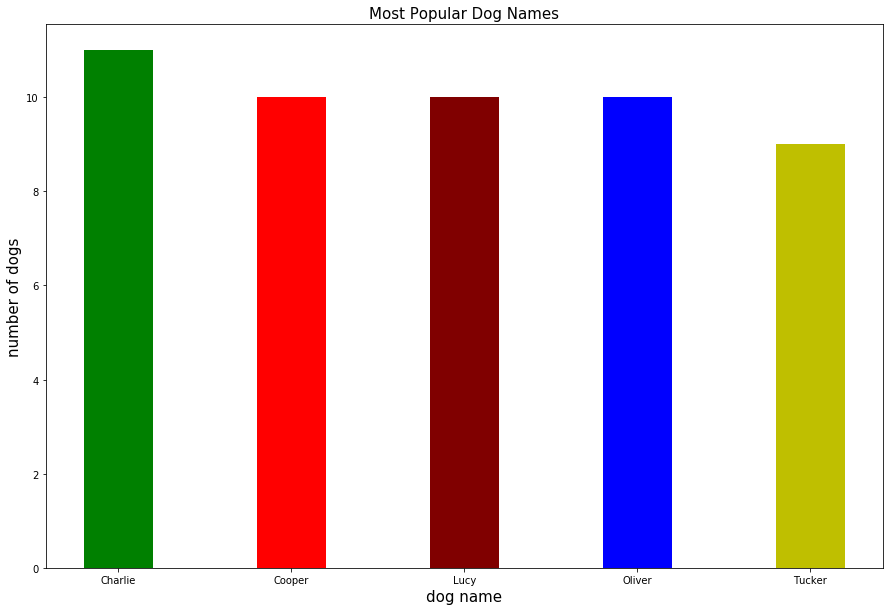

In [200]:
# plot the popular dog names

fig = plt.figure(figsize = (15, 10))
plt.bar(pop_dogs.index, pop_dogs.values, color = ['g','b','r','maroon','y'], width = 0.4)

plt.xlabel("dog name",fontsize=15)
plt.ylabel('number of dogs',fontsize=15)
plt.title("Most Popular Dog Names",fontsize=15)
plt.show()



In [201]:
# Create a dog breed column to visualize according to breeds
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html

df['dog_breed'] = 'None'

for i, row in df.iterrows():

    if row.p1_dog:
        df.set_value(i, 'dog_breed', row.p1)
    elif row.p2_dog and row.rating_numerator >= 10:
        df.set_value(i, 'dog_breed', row.p2)
    elif row.p3_dog and row.rating_numerator >= 10:
        df.set_value(i, 'dog_breed', row.p3)
    else:
        df.set_value(i, 'dog_breed', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [202]:
#replace None with NaN to easily visualize & show top 8 breed

df.dog_breed = df.dog_breed.replace('None',np.nan)
breeds = df.dog_breed.value_counts()[:8]
breeds

golden_retriever      155
labrador_retriever    107
pembroke              94 
chihuahua             86 
pug                   60 
toy_poodle            49 
chow                  46 
samoyed               42 
Name: dog_breed, dtype: int64

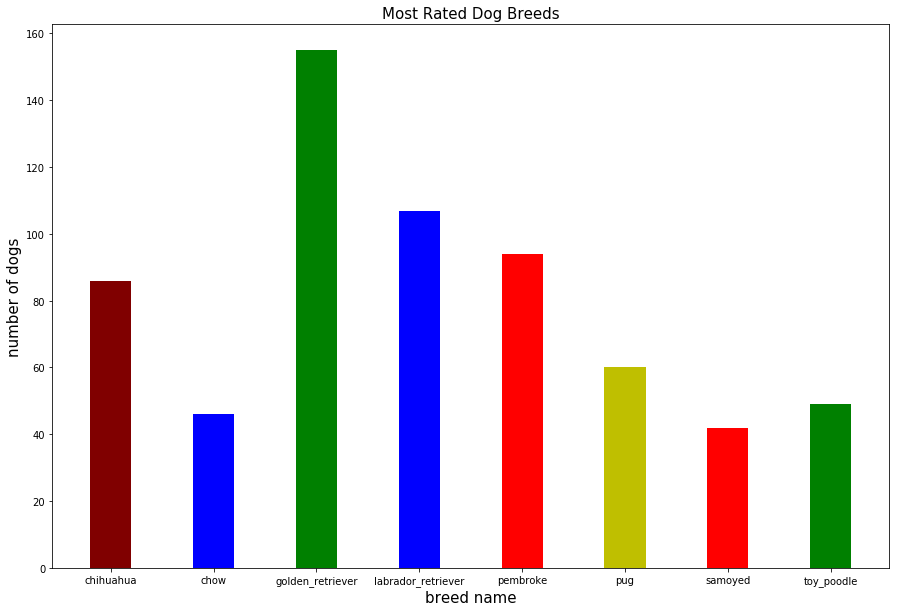

In [203]:
# plot the most rated breed names

fig = plt.figure(figsize = (15, 10))
plt.bar(breeds.index, breeds.values, color = ['g','b','r','maroon','y'], width = 0.4)

plt.xlabel("breed name",fontsize=15)
plt.ylabel('number of dogs',fontsize=15)
plt.title("Most Rated Dog Breeds",fontsize=15)
plt.show()


In [204]:
# Calculate the average rating for each breed group 

high_rating = df.groupby('dog_breed').dogs_rating.mean().sort_values(ascending = False)[:7]
high_rating

dog_breed
bouvier_des_flandres    1.300000
saluki                  1.250000
briard                  1.233333
tibetan_mastiff         1.225000
border_terrier          1.214286
silky_terrier           1.200000
standard_schnauzer      1.200000
Name: dogs_rating, dtype: float64

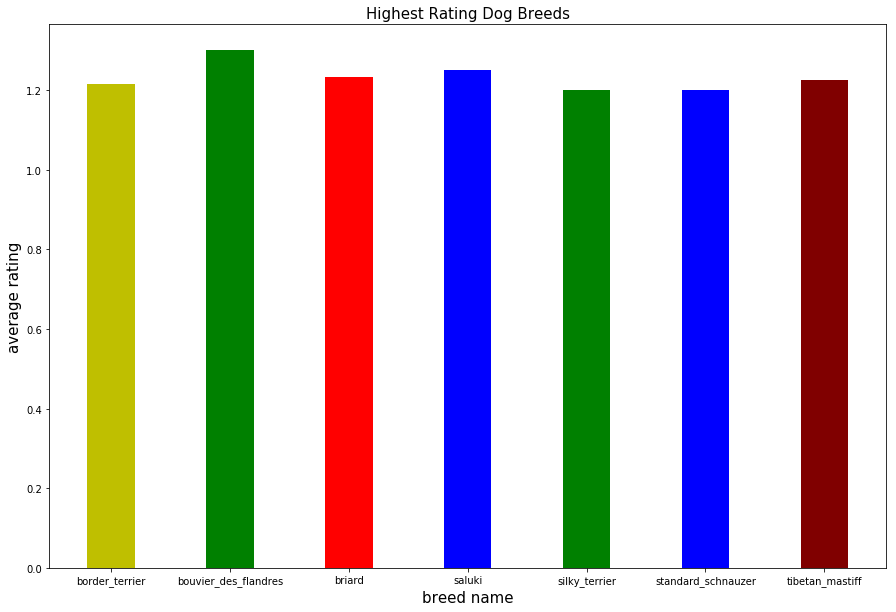

In [205]:
# plot the top 10 highest rating breed 

fig = plt.figure(figsize = (15, 10))
plt.bar(high_rating.index, high_rating.values, color = ['g','b','r','maroon','y'], width = 0.4)

plt.xlabel("breed name",fontsize=15)
plt.ylabel('average rating',fontsize=15)
plt.title("Highest Rating Dog Breeds",fontsize=15)
plt.show()

Text(0,0.5,'Retweet_count')

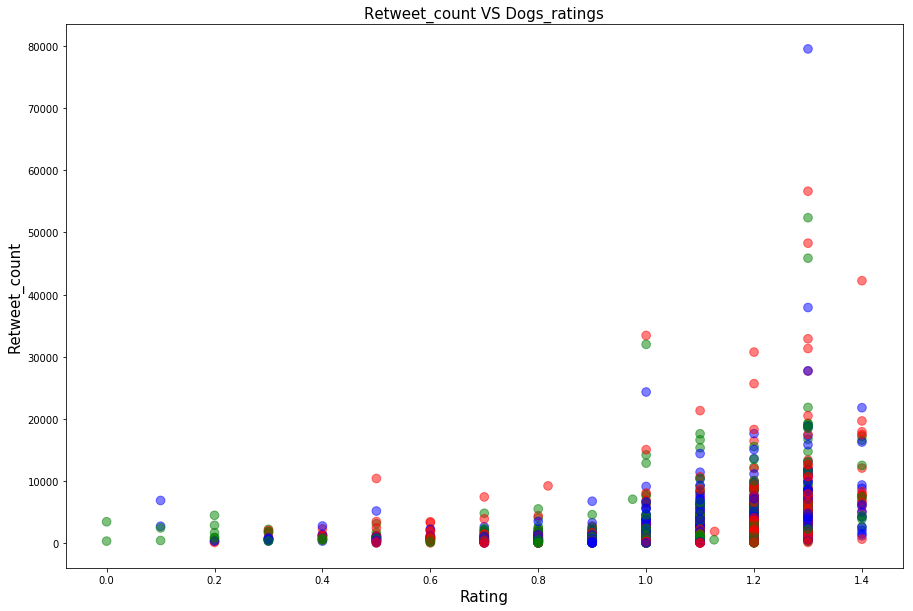

In [206]:
# Relation between retweet_count & dogs_rating 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

df.plot.scatter(y='retweet_count',x='dogs_rating', alpha = 0.5, s= 75, c = 'RGB', figsize=(15,10))
plt.title('Retweet_count VS Dogs_ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Retweet_count', fontsize=15)

In [207]:
# Calculate correlation between retweet & Rating 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

df[['dogs_rating','retweet_count']].corr(method = 'pearson')

,dogs_rating,retweet_count
dogs_rating,1.000000,0.302216
retweet_count,0.302216,1.000000


Text(0,0.5,'favorite_count')

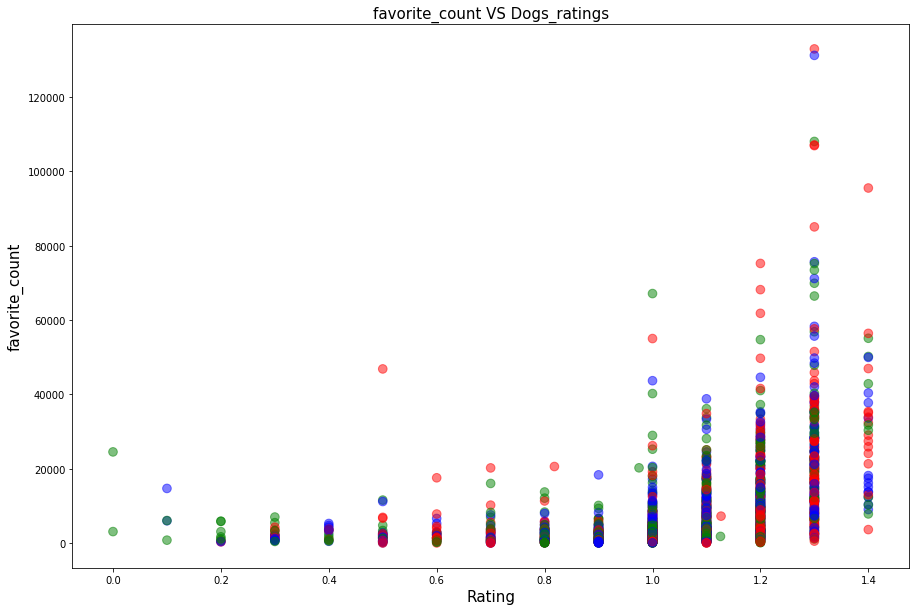

In [208]:
# Relation dogs_rating VS favorite count 

df.plot.scatter(y='favorite_count',x='dogs_rating', alpha = 0.5, s= 75, c = 'RGB', figsize=(15,10))
plt.title('favorite_count VS Dogs_ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('favorite_count', fontsize=15)

In [209]:
# corr coefficient 
df[['dogs_rating','favorite_count']].corr(method = 'pearson')

,dogs_rating,favorite_count
dogs_rating,1.000000,0.404014
favorite_count,0.404014,1.000000


Text(0,0.5,'favorite_count')

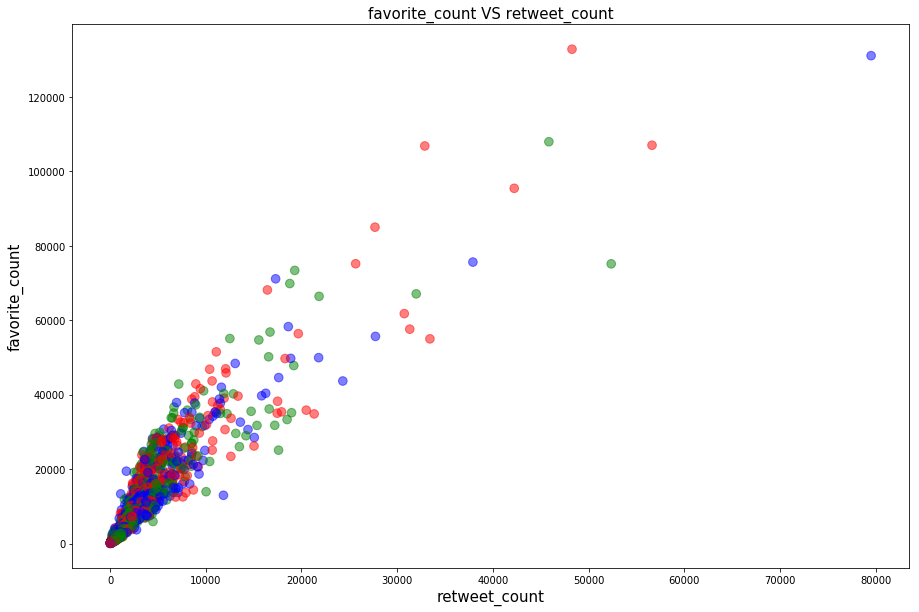

In [210]:
# Relation favorite Count VS retweet_count 

df.plot.scatter(y='favorite_count',x='retweet_count', alpha = 0.5, s= 75, c = 'RGB', figsize=(15,10))
plt.title('favorite_count VS retweet_count', fontsize=15)
plt.xlabel('retweet_count', fontsize=15)
plt.ylabel('favorite_count', fontsize=15)

In [211]:
# corr coefficient 
df[['retweet_count','favorite_count']].corr(method = 'pearson')

,retweet_count,favorite_count
retweet_count,1.000,0.913
favorite_count,0.913,1.000


In [214]:
# convert timestamp to datetime format. 
df.timestamp  = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 25 columns):
Unnamed: 0            1991 non-null int64
tweet_id              1991 non-null int64
timestamp             1991 non-null datetime64[ns]
source                1991 non-null object
text                  1991 non-null object
expanded_urls         1991 non-null object
rating_numerator      1991 non-null float64
rating_denominator    1991 non-null float64
name                  1397 non-null object
retweet_count         1991 non-null int64
favorite_count        1991 non-null int64
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 n

In [236]:
# groupby weekly to plot number of tweets overtime 
#https://stackoverflow.com/questions/42255458/how-to-group-a-pandas-dataframe-by-a-defined-time-interval
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

df_weekly = df.groupby(pd.Grouper(key='timestamp', freq='W')).count().reset_index()
df_weekly.head()

,timestamp,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,dogs_rating,dog_breed
0,2015-11-15,3,3,3,3,3,3,3,0,3,...,3,3,3,3,3,3,3,0,3,3
1,2015-11-22,137,137,137,137,137,137,137,64,137,...,137,137,137,137,137,137,137,0,137,102
2,2015-11-29,138,138,138,138,138,138,138,97,138,...,138,138,138,138,138,138,138,1,138,97
3,2015-12-06,115,115,115,115,115,115,115,81,115,...,115,115,115,115,115,115,115,15,115,75
4,2015-12-13,115,115,115,115,115,115,115,59,115,...,115,115,115,115,115,115,115,23,115,90


Text(0.5,0,'time')

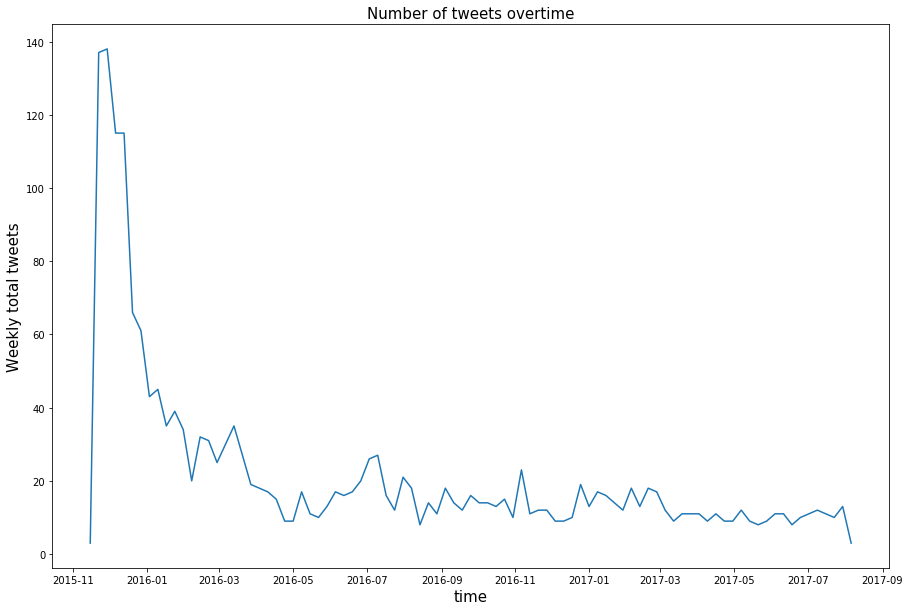

In [234]:
# plot number of tweeets over time

plt.figure(figsize=(15, 10))
plt.plot(df_weekly.timestamp,df_weekly.tweet_id)

plt.title('Number of tweets overtime', fontsize=15)
plt.ylabel('Weekly total tweets', fontsize=15)
plt.xlabel('time', fontsize=15)


## Conclusions 

1. Most popular dog name is `Charlie`
2. Most rated (tweeted) dog breed is `Golden Retriever`
3. The highest rated dog breed is `bouvier_des_flandres`
4. There is positive but not a strong correlation between Retweet_counts & Rating. Correlatin Coeff is 0.3
5. There is positive but not a strong correlation between favorite_counts & Rating. Correlatin Coeff is 0.4
6. There is positive and **strong** correlation between Retweet & Favorite counts. Correlatin Coeff is 0.91
7. The total number of tweets has gradually decreased over time. 